In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [2]:
iris=pd.read_csv('Iris.csv',index_col=0)

In [3]:
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
label_encoder=preprocessing.LabelEncoder()
iris['Species']=label_encoder.fit_transform(iris['Species'])#Converting 'species' column from categorical textual data to categorical numeric data

In [5]:
x=iris.iloc[:,0:4]
y=iris['Species']

In [6]:
x

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,,,,
1,5.1,3.5,1.4,0.2
2,4.9,3.0,1.4,0.2
3,4.7,3.2,1.3,0.2
4,4.6,3.1,1.5,0.2
5,5.0,3.6,1.4,0.2
...,...,...,...,...
146,6.7,3.0,5.2,2.3
147,6.3,2.5,5.0,1.9
148,6.5,3.0,5.2,2.0


In [7]:
y #As we have only "Species" column in y var and also we have applied label encoding in this column so the values will be now changed to categorical numeric column

Id
1      0
2      0
3      0
4      0
5      0
      ..
146    2
147    2
148    2
149    2
150    2
Name: Species, Length: 150, dtype: int32

In [8]:
iris['Species'].unique()

array([0, 1, 2])

In [9]:
iris.Species.value_counts()

0    50
1    50
2    50
Name: Species, dtype: int64

In [10]:
colnames=list(iris.columns)
colnames

['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'Species']

In [11]:
#Splitting data into training and test dataset
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=40)

## Performing C5.0 Decision Tree algorithm- Building Decision Tree Classifier using Entropy Criteria

In [12]:
model=DecisionTreeClassifier(criterion='entropy',max_depth=3) #'max_depth' represents the no. of levels that we want to display in the decision tree
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

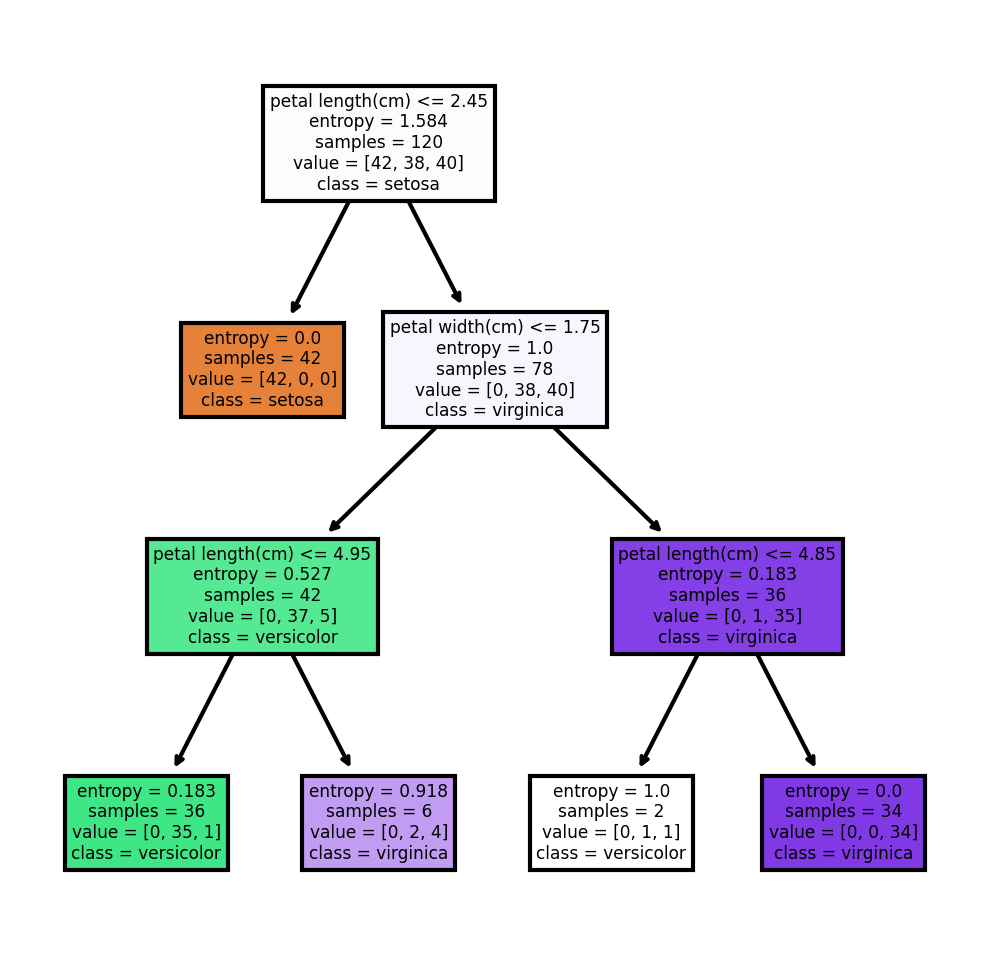

In [13]:
#Plotting the decision tree
fn=['sepal length (cm)','sepal width (cm)','petal length(cm)','petal width(cm)'] #feature name
cn=['setosa','versicolor','virginica'] #class name
fig,axes=plt.subplots(nrows=1,ncols=1,figsize=(4,4),dpi=300) #'dpi' is the pixel size
tree.plot_tree(model,feature_names=fn,class_names=cn,filled=True);

In [14]:
#Predicting on test data
preds=model.predict(x_test)
pd.Series(preds).value_counts()

1    13
2     9
0     8
dtype: int64

#### In the above cell, x_test data is used to evaluate the model. In the o/p obtained, out of total 30 test data records, 13 records are predicted to belong to the versicolor category, 9 records are predicted to belong to the virginica category, 8 records are predicted to belong to the setosa category.

In [15]:
preds

array([0, 1, 2, 2, 1, 2, 1, 1, 1, 0, 1, 0, 0, 1, 1, 2, 2, 2, 1, 1, 2, 2,
       1, 0, 1, 0, 0, 2, 0, 1])

In [16]:
pd.crosstab(y_test,preds)

col_0,0,1,2
Species,,,
0,8,0,0
1,0,12,0
2,0,1,9


#### In the above o/p, only the diagonal values represent the correct classifcation and the non diagonal values represent misclassification.

In [17]:
#finding the accuracy
np.mean(preds==y_test)

0.9666666666666667

## Performing CART Decision Tree Classifier using Gini Criteria

In [18]:
from sklearn.tree import DecisionTreeClassifier
model_gini=DecisionTreeClassifier(criterion='gini',max_depth=3)

In [19]:
model_gini.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [20]:
#predicting and computing the accuracy
pred=model_gini.predict(x_test)
np.mean(preds==y_test) #comparing the predicted and actual values for calculating the accuracy

0.9666666666666667

## Performing CART Decision Tree Regression

In [21]:
from sklearn.tree import DecisionTreeRegressor

In [22]:
array=iris.values #converting all the values in the iris dataset as an array format
x=array[:,0:3] #1st 3 columns are considered as x var
y=array[:,3] #last column considered as y var

In [23]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=1)

In [24]:
model=DecisionTreeRegressor()
model.fit(x_train,y_train)

DecisionTreeRegressor()

In [25]:
pred=model.predict(x_test) #evaluating on the basis of x_test data

In [26]:
pred

array([0.4, 1. , 1.4, 0.1, 2.2, 1.4, 1.5, 0.2, 0.2, 2.3, 1.3, 0.2, 1.6,
       1.4, 1.5, 0.2, 1. , 1.2, 0.2, 0.2, 1.3, 1.2, 1.5, 0.2, 2.5, 1.3,
       0.1, 0.4, 1.4, 1.5, 1.4, 2.1, 1.3, 2.2, 1.9, 0.2, 1.1, 0.2, 1.5,
       1.4, 2.1, 0.2, 1.6, 2.2, 1.5, 1.4, 0.2, 0.2, 0.1, 1.3])

#### Above are the predicted petal.width values for the test date i.e  33% of 150 records

In [27]:
model.score(x_test,y_test)

0.8551746908392364